In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/', force_remount=True)

import os
os.chdir("/content/gdrive/My Drive/112_2_LATIA/week3_030524/") # 切換目錄
!ls -l "/content/gdrive/My Drive/112_2_LATIA/week3_030524/" # 列出目錄下的檔案

Mounted at /content/gdrive/
total 20376
-r-------- 1 root root    92484 Feb 26 03:15 112_student.csv
-rw------- 1 root root   112488 Mar 14 08:30 112_students_tf.csv
-rw------- 1 root root 20659344 Mar 14 08:30 TaipeiSansTCBeta-Regular.ttf


In [ ]:
import pandas as pd

csv_file = './112_student.csv'
df = pd.read_csv(csv_file) # 讀取csv檔案
print(df.head(), '\n')

#查看資料欄位資訊
print('\n', df.info(verbose=True, show_counts=True))

print('\n', df.isna().sum()) # 計算缺失數量並印出來

#查看資料的統計學資訊描述
print('\n', df.describe(include='all'))

   學年度  學校代碼    學校名稱 日間∕進修別   等級別    總計   男生計   女生計  一年級男  一年級女  ...  五年級男  \
0  112     1  國立政治大學    D 日  D 博士   921   517   404    86    69  ...    63   
1  112     1  國立政治大學    D 日  M 碩士  4231  1835  2396   598   809  ...     2   
2  112     1  國立政治大學    N 職  M 碩士  1903   938   965   262   304  ...    77   
3  112     1  國立政治大學    D 日  B 學士  9763  3928  5835   906  1349  ...     0   
4  112     2  國立清華大學    D 日  D 博士  1636  1131   505   206    93  ...   140   

   五年級女  六年級男  六年級女  七年級男  七年級女  延修生男  延修生女    縣市名稱   體系別  
0    52    68    37    66    50     0     0  30 臺北市  1 一般  
1     1     1     0     0     0     0     0  30 臺北市  1 一般  
2    57     0     0     0     0     0     0  30 臺北市  1 一般  
3     0     0     0     0     0   316   499  30 臺北市  1 一般  
4    60   110    50   115    56     0     0  18 新竹市  1 一般  

[5 rows x 26 columns] 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 764 entries, 0 to 763
Data columns (total 26 columns):
 #   Column  Non-Null Count  Dtype 
---  

In [ ]:
df1 = df[['學年度', '學校代碼', '學校名稱', '等級別', '總計', '男生計', '女生計']] # 取出想要觀看的欄位
print("本資料集共有", len(df1), "筆紀錄")

df1_1 = df1[df1['等級別'] == 'B 學士']
print("有招生學士學制的學校數量為", len(df1_1), "\n")

df1_1_sorted = df1_1.sort_values(by='總計', ascending=False)
print("112學年度在籍的學士生最多人數第1名為", df1_1_sorted.head(1)["學校名稱"].values)

本資料集共有 764 筆紀錄
有招生學士學制的學校數量為 97 

112學年度在籍的學士生最多人數第1名為 ['淡江大學']


In [ ]:
type_list = []

for i in df['學校名稱']:
    if ('國立' in i) or ('市立' in i):
        type_list.append('國立')
    else:
        type_list.append('私立')

df['公私立'] = type_list # 將 Dataframe 新增「公私立」column

df2 = df.drop_duplicates('學校代碼')

count = df2['公私立'].value_counts()
print(f"本資料集共收集了 {len(df2)} 所學校，其中公立：{count['國立']} 所；私立：{count['私立']} 所。")

本資料集共收集了 145 所學校，其中公立：47 所；私立：98 所。


In [ ]:
df3 = df.drop_duplicates(subset=['學校名稱', '等級別'])
count = df3['等級別'].value_counts()
degree_list = list(df['等級別'].unique())

print(f"本資料集總共收集了 {len(set(df['學校代碼']))} 所學校，各等級學制當中：")
for degree in degree_list:
    print(f"一共有{count[degree]} 所學校， 有招收{degree[2:]}。")

本資料集總共收集了 145 所學校，各等級學制當中：
一共有84 所學校， 有招收博士。
一共有130 所學校， 有招收碩士。
一共有67 所學校， 有招收學士。
一共有1 所學校， 有招收4+X。
一共有71 所學校， 有招收二技。
一共有66 所學校， 有招收四技。
一共有46 所學校， 有招收五專。
一共有2 所學校， 有招收七年。
一共有46 所學校， 有招收二專。
一共有1 所學校， 有招收二年制。


In [ ]:
!wget -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.font_manager import fontManager

fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
mpl.rc('font', family='Taipei Sans TC Beta')

--2024-03-14 11:39:38--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 142.251.6.139, 142.251.6.138, 142.251.6.102, ...
Connecting to drive.google.com (drive.google.com)|142.251.6.139|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_ [following]
--2024-03-14 11:39:38--  https://drive.usercontent.google.com/download?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 64.233.182.132, 2607:f8b0:4001:c58::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|64.233.182.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20659344 (20M) [application/octet-stream]
Saving to: ‘TaipeiSansTCBeta-Regular.ttf’

TaipeiSansTCBeta-Re 100%[===================>]  19.70M  50.0MB/s    in 0.4s    

2024-03-14 11:39:43 (

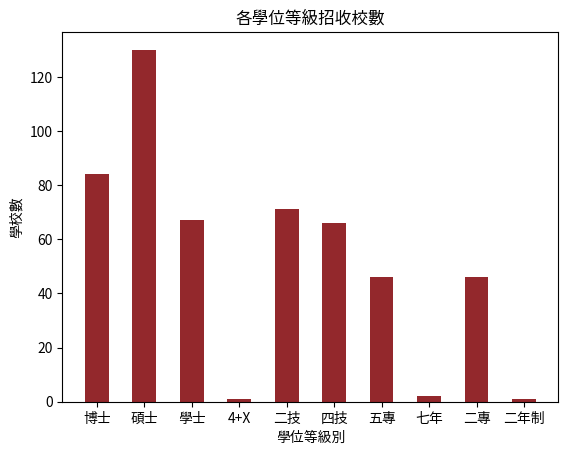

In [ ]:
df3_1 = df.drop_duplicates(subset=['學校名稱', '等級別'])
count = df3_1['等級別'].value_counts()
listx = [x[2:] for x in list(df['等級別'].unique())]
listy = [count[x] for x in list(df['等級別'].unique())]

plt.bar(listx, listy, width=0.5, color='#93282c')
plt.title('各學位等級招收校數')
plt.xlabel('學位等級別')
plt.ylabel('學校數')
plt.show()

In [ ]:
city_list = []

for i in df['縣市名稱']:
    city_list.append(i[3:])

df['縣市名'] = city_list
df4 = df.drop_duplicates('學校代碼')
count = df4['縣市名'].value_counts()
city_list = df4['縣市名'].unique()
print(f"本資料集共收集了 {len(df4)} 學校，其中：")

for city in city_list:
    print(f"{city}有 {count[city]} 所")

newtaipei = df4[df4['縣市名'] == '新北市']
print('\n') #斷行的用途
print(newtaipei['縣市名'].value_counts())

本資料集共收集了 145 學校，其中：
臺北市有 24 所
新竹市有 5 所
臺南市有 13 所
臺中市有 17 所
桃園市有 12 所
高雄市有 15 所
基隆市有 3 所
嘉義縣有 4 所
彰化縣有 4 所
新北市有 20 所
嘉義市有 2 所
花蓮縣有 4 所
南投縣有 2 所
雲林縣有 3 所
屏東縣有 5 所
臺東縣有 2 所
宜蘭縣有 3 所
苗栗縣有 3 所
澎湖縣有 1 所
金門縣有 1 所
新竹縣有 2 所


新北市    20
Name: 縣市名, dtype: int64


In [ ]:
city_to_area = {'臺北市':'北部',
         '新北市':'北部',
         '基隆市':'北部',
         '新竹市':'北部',
         '桃園市':'北部',
         '新竹縣':'北部',
         '宜蘭縣':'北部',
         '臺中市':'中部',
         '苗栗縣':'中部',
         '彰化縣':'中部',
         '南投縣':'中部',
         '雲林縣':'中部',
         '高雄市':'南部',
         '臺南市':'南部',
         '嘉義市':'南部',
         '嘉義縣':'南部',
         '屏東縣':'南部',
         '澎湖縣':'南部',
         '花蓮縣':'東部',
         '臺東縣':'東部',
         '金門縣':'福建省'}

df['區域'] = df['縣市名'].map(city_to_area)

df5 = df.drop_duplicates('學校代碼')
count = df5['區域'].value_counts()
print(f"本資料集共收集了 {len(df5)} 所學校，其中：")
print(f"北部區域有 {count['北部']} 所；\n中部區域有 {count['中部']} 所；\n南部區域有 {count['南部']} 所；\n東部區域有 {count['東部']} 所；\n福建省區域有 {count['福建省']} 所。")

本資料集共收集了 145 所學校，其中：
北部區域有 69 所；
中部區域有 29 所；
南部區域有 40 所；
東部區域有 6 所；
福建省區域有 1 所。


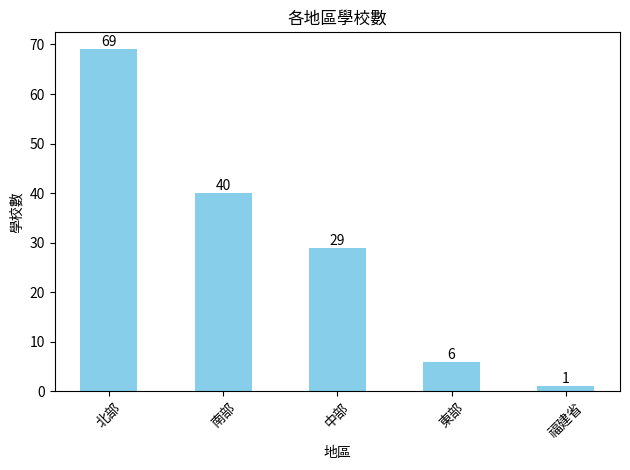

In [ ]:
df5_1 = df.drop_duplicates('學校代碼')
count = df5_1['區域'].value_counts()
listx = [count[x] for x in list(df['區域'].unique())]
listy = df['區域'].unique()

plt.bar(listy, listx, width=0.5, color='skyblue')

for i, value in enumerate(listx):
    plt.text(listy[i], value, str(value), ha='center', va='bottom')

plt.title('各地區學校數')
plt.xlabel('地區')
plt.ylabel('學校數')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
df6 = df.drop_duplicates('學校代碼')
count = df6['體系別'].value_counts()

print(f"本資料集共收集了 {len(df6)} 所學校，其中：技職體系有 {count['2 技職']} 所；一般體系有 {count['1 一般']} 所；師範體系有 {count['3 師範']} 所。")

本資料集共收集了 145 所學校，其中：技職體系有 78 所；一般體系有 62 所；師範體系有 5 所。


In [ ]:
count = {}

def create_count_dict(df, count): # 建立多層 dict 結構來儲存各校在學與延修生的男女生數
    df7 = df.drop_duplicates('學校代碼')
    for i in df7['學校名稱']:
        count[i] = {}
        count[i]['在學生'] = {}
        count[i]['在學生']['男生數'] = 0
        count[i]['在學生']['女生數'] = 0
        count[i]['延修生'] = {}
        count[i]['延修生']['男生數'] = 0
        count[i]['延修生']['女生數'] = 0


def count_every_schools_data(df):
    for j in range(len(df)):
        count[df.iloc[j,2]]['在學生']['男生數'] += (int(df.iloc[j,8]) + int(df.iloc[j,10]) + int(df.iloc[j,12]) + int(df.iloc[j,14]) + int(df.iloc[j,16]) + int(df.iloc[j,18]) + int(df.iloc[j,20]))
        count[df.iloc[j,2]]['在學生']['女生數'] += (int(df.iloc[j,9]) + int(df.iloc[j,11]) + int(df.iloc[j,13]) + int(df.iloc[j,15]) + int(df.iloc[j,17]) + int(df.iloc[j,19]) + int(df.iloc[j,21]))
        count[df.iloc[j,2]]['延修生']['男生數'] += int(df.iloc[j,22])
        count[df.iloc[j,2]]['延修生']['女生數'] += int(df.iloc[j,23])

create_count_dict(df, count) # 執行Line37定義的Function
count_every_schools_data(df) # 執行Line49定義的Function

In [ ]:
public_current_male = 0
public_current_female = 0

df7_1 = df.drop_duplicates('學校代碼', ignore_index=True)
for i in range(len(df7_1)):
    if df7_1.loc[i,'公私立'] == '國立':
        public_current_male += count[df7_1.loc[i,'學校名稱']]['在學生']['男生數']
        public_current_female += count[df7_1.loc[i,'學校名稱']]['在學生']['女生數']

ratio = public_current_male/public_current_female*100 # 男女比計算公式
print(f'國立大學在學生男女比：{ratio} ≑ {round(ratio,2)}') # 四捨五入至小數點後兩位

df7_2 = df.drop_duplicates('學校代碼', ignore_index=True)
for i in range(len(df7_2)):
    if df7_2.loc[i,'公私立'] == '私立':
        public_current_male += count[df7_1.loc[i,'學校名稱']]['在學生']['男生數']
        public_current_female += count[df7_1.loc[i,'學校名稱']]['在學生']['女生數']

ratio = public_current_male/public_current_female*100 # 男女比計算公式
print(f'私立大學在學生男女比：{ratio} ≑ {round(ratio,2)}') # 四捨五入至小數點後兩位

df7_3 = df.drop_duplicates('學校代碼', ignore_index=True)
for i in range(len(df7_3)):
    if df7_3.loc[i,'公私立'] == '國立':
        public_current_male += count[df7_1.loc[i,'學校名稱']]['延修生']['男生數']
        public_current_female += count[df7_1.loc[i,'學校名稱']]['延修生']['女生數']

ratio = public_current_male/public_current_female*100 # 男女比計算公式
print(f'國立大學延修生男女比：{ratio} ≑ {round(ratio,2)}') # 四捨五入至小數點後兩位

df7_4 = df.drop_duplicates('學校代碼', ignore_index=True)
for i in range(len(df7_4)):
    if df7_4.loc[i,'公私立'] == '私立':
        public_current_male += count[df7_1.loc[i,'學校名稱']]['延修生']['男生數']
        public_current_female += count[df7_1.loc[i,'學校名稱']]['延修生']['女生數']

ratio = public_current_male/public_current_female*100 # 男女比計算公式
print(f'私立大學延修生男女比：{ratio} ≑ {round(ratio,2)}') # 四捨五入至小數點後兩位

國立大學在學生男女比：119.10964038427396 ≑ 119.11
私立大學在學生男女比：96.44547804394217 ≑ 96.45
國立大學延修生男女比：96.9910906275184 ≑ 96.99
私立大學延修生男女比：97.83110715989419 ≑ 97.83


In [ ]:
df8 = df.drop_duplicates('學校代碼')
system_count = df8['體系別'].value_counts()

system_list = list(df['體系別'].unique())
count_student = 0
result_dict = {}

for system in system_list:
    for i in range(len(df)):
        if df.loc[i,'體系別'] == system:
            count_student += int(df.loc[i, '總計'])
    result_dict[system[2:]] = count_student/system_count[system]
    count_student = 0

max_value = max(result_dict.values())
min_value = min(result_dict.values())
max_key = next(key for key, value in result_dict.items() if value == max_value)
min_key = next(key for key, value in result_dict.items() if value == min_value)

print(f"每校平均最多人的是{max_key}體系，平均每校 {round(max_value,2)} 人；")
print(f"每校平均最少人的是{min_key}體系，平均每校 {round(min_value,2)} 人。")

每校平均最多人的是一般體系，平均每校 9224.89 人；
每校平均最少人的是技職體系，平均每校 6143.56 人。


In [ ]:
df.head(2)
df.to_csv('112_students_tf.csv', encoding='utf-8', sep=',')

In [44]:
df01_0=list(df['日間∕進修別'].unique())
df01_1=df['日間∕進修別'].value_counts()
for i in df01_0:
  print(f"{i}:{df01_1[i]}")

D 日:448
N 職:120
P 進:30
N 修:166


In [ ]:
#列出校人口超過15000
import numpy as np
df02=df['學校名稱'].drop_duplicates()
total_students=np.zeros(len(df02),dtype=int)
new_students=total_students.copy()

tmpName=df['學校名稱'][0]
tmp=0
tmp2=0
j=0
def examine():
  global tmpName,tmp,tmp2,j
  if tmp>=15000:
    print(tmpName)
  total_students[j]=tmp
  new_students[j]=tmp2
  j+=1
  tmp=df['總計'][i]
  tmp2=df['一年級男'][i]+df['一年級女'][i]
  tmpName=df['學校名稱'][i]

for i in range(len(df)):
  if df['學校名稱'][i]==tmpName:
    tmp+=df['總計'][i]
    tmp2+=df['一年級男'][i]+df['一年級女'][i]
  else:
    examine()

examine()



國立政治大學
國立清華大學
國立臺灣大學
國立臺灣師範大學
國立成功大學
國立中興大學
國立陽明交通大學
國立臺中科技大學
國立高雄科技大學
東海大學
輔仁大學
東吳大學
中原大學
淡江大學
中國文化大學
逢甲大學
銘傳大學
正修科技大學


Correlation coefficient: 0.9817497943392279


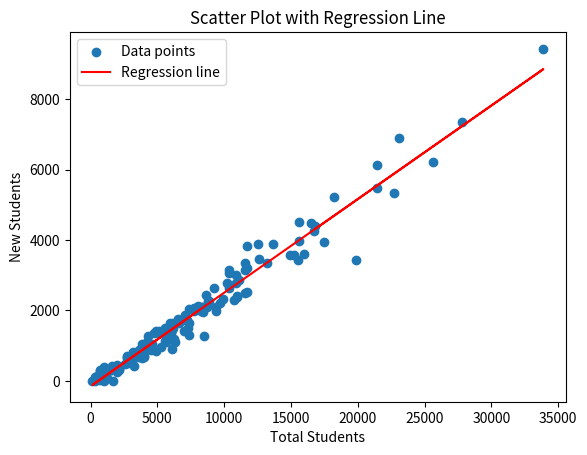

In [ ]:
import matplotlib.pyplot as plt

def plot_regression():
    global total_students, new_students
    corr_coef = np.corrcoef(total_students, new_students)[0, 1]
    print(f"Correlation coefficient: {corr_coef}")

    coefficients = np.polyfit(total_students, new_students, 1)
    regression_line = np.polyval(coefficients, total_students)
    plt.scatter(total_students, new_students, label='Data points')

    # Plot the regression line
    plt.plot(total_students, regression_line, color='red', label='Regression line')

    plt.xlabel('Total Students')
    plt.ylabel('New Students')
    plt.title('Scatter Plot with Regression Line')

    plt.legend()
    plt.show()
plot_regression()